<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:200%;
           font-family:Arial;letter-spacing:0.5px">

<p width = 20%, style="padding: 10px;
              color:white;">
Hypothesis Testing(z-test) 
              
</p>
</div>

Data Science Cohort Live NYC Feb 2023
<p>Phase 2: Topic 14</p>
<br>
<br>

<div align = "right">
<img src="images/flatiron-school-logo.png" align = "right" width="200"/>
</div>
    

In [1]:
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## WARM UP
* What is a standard normal distribution?
* How do we calculate the z-score?
* How do we calculate aplha?

# Objectives

- Describe the basic framework and vocabulary for hypothesis testing
- Define Null and Alternative Hypotheses
- Define p-value, $\alpha$
- Perform z-tests

# Motivation for Hypothesis Testing

When we want to be able to determine something about the world, we typically turn to science. And science is really built upon the idea testing ideas through **experiments**. If we have an idea, but our experiment(s) shows that it's unlikely to be true, then we learned something about our world!

<img src="https://upload.wikimedia.org/wikipedia/commons/8/89/Beaker_-_The_Noun_Project.svg" width=300/>

Data _science_ can use this same process and it can be formalized through a statistical process called a **hypothesis test**. But before we can talk about performing these tests, we need to talk about how we design our experiments.

# Experiment Design

Experiments are how we get the data we need to determine if our observations are worthwhile! But if you have a poorly designed experiment, you can't trust the observations/data to say anything useful.

> **NOTE**
>
> We typically use the term "experiment" when doing a hypothesis test. This can be a little confusing when the data has been collected _before_ any other step. This is fine but we should consider if this experiment follows the general criteria of a "good" design.

## The Scientific Method

You should consider if the question you're looking to answer can be investigated with the **scientific method**. If it is, we can feel better that we're asking a _scientific question_ (compared to a question that is *unverifiable*).

There is no completely agreed upon "scientific method" but the following should help us know if we're on the right track:

- Question/Observation
- Background Knowledge
- Hypothesis
- Experiment
- Analysis
- Conclusions

## Making a Good Experiment

We strive to make the best we can which is a perfectly designed experiment that would test every possible answer to a question. Of course this is unrealistic, though we strive towards the best experiment we can to answer questions.

Below are a few items to consider for a good experiment. An experiment doesn't have to fulfill everything to still be useful, though the more items off the checkoff list the more certain we'll feel about our results. 

### Control Groups

> Your experiment should consider other factors that could affect the outcome and try to account for (or *control*) those factors

### Random Trials

> By having random trials/samples, you're less likely to have bias in your observations/data

### Sample Size

> A large enough sample size that we can reasonably extrapolate to the population of interest

### Reproducible

> Being able to reproduce the experiment means we can test again and ensure are results are valid.

## Scenarios

- Chemistry - do inputs from two different barley fields produce different
yields?
- Astrophysics - do star systems with near-orbiting gas giants have hotter
stars?
- Medicine - BMI vs. Hypertension, etc.
- Business - which ad is more effective given engagement?

![img1](./images/img1.png)

![img2](./images/img2.png)

# Introducing Hypothesis Testing

## Intuition

Suppose we gather a sample of data. We want to know if the sample is a good representation of some known population. How can we make an appropriate guess about how *representative* the sample is of that population?

## Scenario

Imagine we're driving down the road of our hometown and see a local high school's school bus broken down at the side of the road. All of the students are safely waiting outside of the bus and you notice that they seem a bit on the taller side.


![](./images/off_the_bus.gif)

You wonder if these students are representative of the full student body or are particularly special in terms of height (maybe they could all be on the basketball team 🏀).

We can quantify how _"weird"_ this group is compared to the student body knowing/measuring the means and standard deviations of the population and sample. 

> This is at heart what hypothesis testing is: ***"Does our sample come from the population or is it a special set?"***

Suppose we already know that high school students are on average $65$ inches with a standard deviation of $3$ inches.

If we measured everyone on that bus, we would have found that their average height was $73$ inches. Through standardization, we know then the $z$-score for these particular students is $\frac{73-65}{3}=\frac{8}{3}\approx 2.7$.

According to the empirical (68–95–99.7) rule for normal distributions there is only roughly a $0.1\%$ chance that the sample came from the same population, because it is roughly 3 standard deviations above the mean. Seems unlikely that these students aren't a special subset of the student population.

<img src="./images/normal_sd_new.png" width="500">
 

> **NOTE**
> 
> We will later formalize this by defining a _threshold value_ $\alpha$ (called the **significance level**) to decide whether we believe that the sample is from the same underlying population or not.

In [8]:
import pandas as pd

In [10]:
norm = [stats.norm.pdf(i) for i in np.linspace(-3,3,1000)]
pd.Series([stats.norm.pdf(i) for i in np.linspace(-3,3,1000)]).describe()

count    1000.000000
mean        0.166055
std         0.139330
min         0.004432
25%         0.031687
50%         0.129227
75%         0.300628
max         0.398940
dtype: float64

## High-Level Hypothesis Testing

1. Start with a Scientific Question (yes/no)
2. Take the skeptical stance (**null hypothesis**) 
3. State the complement (**alternative hypothesis**)
4. Set a threshold for errors (**$\alpha$ significance level**)
5. Create a model (*test statistic*) of the situation *assuming the null hypothesis is true*
6. Decide whether or not to *reject the null hypothesis* by comparing the *threshold* and *test statistic*

# Steps of a Hypothesis Test

(we'll focus on the one-sample $z$-test)

1. State the null hypothesis and the alternative hypothesis
2. Specify significance level ($\alpha$)
3. Calculate test statistic (z-statistic)
4. Calculate p-value
5. Interpret p-value (reject or fail to reject the null hypothesis) 


## STEP 1: State the Null and Alternative Hypotheses

It's important to state both the **null hypothesis** $H_0$ and **alternative hypothesis** $H_a$ (or $H_1$) so we can be clear in what we can learn from our hypothesis test.

### The Null Hypothesis

> There is NOTHING, **no** difference.
![gmonk](https://vignette.wikia.nocookie.net/villains/images/2/2f/Ogmork.jpg/revision/latest?cb=20120217040244)

> The **null hypothesis** $H_0$ is what we would expect if there is no difference from our sample to our comparison group (population in many cases).

If we're testing the function of a new drug, then the null hypothesis will say something like: 

> The drug has _no effect_ on patients (does not speed up recovery)

If we're testing whether Peeps cause dementia, then the null hypothesis will say:
> There is _no correlation_ between Peeps consumption and the rate of dementia development

### The Alternative Hypothesis 

> The **alternative hypothesis** $H_a$ or $H_1$ says the sample is _different_ from the comparison group. It is essentially the opposite of the null hypothesis (there is an _effect_).

Going back to our drug example, our alternative hypothesis could be:
> The drug _decreases_ the time of recovery (versus not using the drug)

Going back to our Peeps & dementia example, our alternative hypothesis could be:
> There is a _positive correlation_ between Peeps consumption and the rate of dementia development (as Peep consumption increases, the rate of dementia increases).

### 🧠 Knowledge Check

1. A drug manufacturer claims that a drug increases memory. It designs an experiment where both control and experimental groups are shown a series of images, and records the number of correct recollections until an error is made for each group. 

<details>
    <summary>Answer:</summary>
    
    Null: People who took the drug don't have more correct recollections than people who didn't take the drug.

    Alternative: People who took the drug do have more correct recollections than people who didn't take the drug.

2. An online toystore claims that putting a 5 minute timer on the checkout page of its website decreases conversion rate. It sets up two versions of its site, one with a timer and one with no timer. 

<details>
    <summary>Answer:</summary>
    
    Null: The 5-minute timer does not decrease conversion rate (or, even better: the 5-minute timer is not correlated with a decrease in conversion rate).
    
    Alternative: The 5-minute timer decreases conversion rate.

3. The Kansas City public school system wants to test whether the scores of students who take standardized tests under the supervision of teachers differ from the scores of students who take them in rooms with school administrators.

<details>
    <summary>Answer:</summary>
    
    Null: The scores of students who take standardized tests under the supervision of teachers do not differ from the scores of students who take standardized tests under the supervision of school administrators.
    
    Alternative: The scores of students who take standardized tests under the supervision of teachers differ from the scores of students who take standardized tests under the supervision of school administrators.

4. A pest control company believes that the length of cockroach legs in colonies which have persisted after two or more insecticide treatements are longer than those in colonies which have not been treated with insecticide.

<details>
    <summary>Answer:</summary>
    
    Null: The legs of cockroaches in colonies that have persisted after two or more insecticide treatments are not longer than the legs of cockroaches in colonies that have not been treated with insecticide.
    
    Alternative: The legs of cockroaches in colonies that have persisted after two or more insecticide treatments are longer than the legs of cockroaches in colonies that have not been treated with insecticide.
</details>

5. A healthcare company believes patients between the ages of 18 and 25 participate in annual checkups less than all other age groups.

<details>
    <summary>Answer:</summary>
    
    Null:Patients between the ages of 18 and 25 do not participate in annual checkups less than patients in other age groups. 
    
    Alternative: Patients between the ages of 18 and 25 participate in annual checkups less than patients in other age groups.
    
</details>

## STEP 2: Specify Significance Level

Now that we have our hypotheses defined, we have to determine when do we say an observation is **statistically significant**. Basically, how "weird" do things have to be until we reject $H_0$.

We choose a threshold called the **significance level** $\alpha$. The smaller the value, the more "weirdness" we're willing to accept before reject the null hypothesis.

If the probability of observing a weird value (our sample) is smaller than $\alpha$, then we will reject the null-hypothesis.

Typically we choose $\alpha$ to be $0.05$ which means that we have to observe a sample that would occur less than $5\%$ of the time if the null hypothesis is true.

## STEP 3: Calculate the Test Statistic

With the setup from the prior steps, we can now look at our sample. We'll want to find a **test statistic** that can be compared to our distribution (usually something like the normal distribution).

Today we will focus on performing a **$z$-test** which is a hypothesis test that uses the normal curve. So we will find the $z$-score of our sample's mean also known as our **$z$-statistic** in the context of hypothesis testing.

> **NOTE**
>
> Just know that we'll see there are other hypothesis tests that follow the same steps but differ in how we calculate their test statistics. We'll see more types of tests later on.

### Calculating the $z$-statistic

We first need to find the mean value of the sample $\bar{x}$

> **NOTE**
> 
> We use $\bar{x}$ for a sample over $\mu$ which is reserved for a population mean. This is to remind us not to confuse the two.

After finding the mean, we need the standard deviation of the population $\sigma$ to get our $z$-statistic. 

If we already know it, great! But what if we don't?

Well, we can _estimate_ the standard deviation from our sample. We call this the **standard error** $s_\bar{x}$ (or $\hat{\sigma_x}$) and is defined like below:

$$ \large \sigma \approx s_\bar{x} = \frac{s}{\sqrt{n}} $$

where $n$ is the number of data points in the sample and $s$ is the standard deviation of the sample or **sample standard deviation** (sometimes denoted as $\sigma_x$)

We won't dig too deep into this, but notice that the square-root in the denominator. This is because we're saying that the sample standard deviation $s$ is an estimate of the population standard deviation $\sigma$, but as we get more data points in our sample our estimate gets narrower/smaller.

And finally, we can calculate our $z$-statistic:

$$ \large z = \frac{\bar{x} - \mu}{\sigma} $$

> Remember that our $\mu$ comes from the null hypothesis; we expect our sample to have about the same mean as the population if the null hypothesis is true.

## STEP 4: Calculate p-value

The basic idea of a $p$-value is to quantify the probability that the results seen are in fact the result of mere random chance.

This is connected with the null hypothesis: If the null hypothesis is true and there is _**no** significant_ correlation between the population variables and our samples observed variable and would have to be the result of mere random chance.

The p-value is _probability_ that we would observe the sample measurement ($\bar{x}$) assuming the null hypothesis (the standard normal curve). This tells us how _likely or unlikely_ our sample measurement is.

For the $z$-test, we can use the CDF of the normal distribution to find this probability (`p = 1 - scipy.stats.norm.cdf(z_score)`). Shortcut: `p = scipy.stats.norm.sf(z_score)`.

## STEP 5: Interpret p-value

Suppose we calculate a $p$-value for some statistic we've measured and we get a $p$-value of 20%. This would mean that there is a 20% chance that the results we observed were the result of mere random chance. Probably this is high enough that we ought _not_ to reject the null hypothesis that our variables are uncorrelated.

If $p \lt \alpha$, we reject the null hypothesis.:

If $p \geq \alpha$, we fail to reject the null hypothesis.

> **NOTE** 
>
> This only tells us if there is a statistically significant difference not to what _degree_
> ![](https://imgs.xkcd.com/comics/p_values.png)
> ☝️ _Be careful how you interpret your p-value_

> **We never _accept_ the null hypothesis, because future experiments may yield significant results.**

* We do not throw out "failed" experiments! 
* We say "this methodology, with this data, does not produce significant results" 
    * Maybe we need more data!
    

In practice, a $p$-value _threshold_ ($\alpha$) of $5\%$ is very often the default value for these tests of statistical significance. Thus, if it is calculated that the chance that the results we observed were actually the result of randomness is less than 1 in 20, then we would _reject_ the null hypothesis.

### Another Warning

The choice of $\alpha = 0.05$ is arbitrary and has survived as a pseudo-standard largely because of traditions in teaching.

The [American Statistical Association](https://www.amstat.org) has [recently been questioning this standard](https://www.tandfonline.com/toc/utas20/73/sup1?nav=tocList&) and in fact there are movements to reject hypothesis testing in a more wholesale way.

The chief thing to keep in mind is that binary test results are often misleading. And as for an appropriate $p$-level: This really depends on the case. In some scenarios, false positives are more costly than in others. We must also determine our $\alpha$ level *before* we conduct our tests. Otherwise, we will be accused of $p$-hacking.

A cautionary study, the weight-loss chocolate study conducted by John Bohannon: https://www.scribd.com/doc/266969860/Chocolate-causes-weight-loss

> Article on explaining the whole ordeal https://io9.gizmodo.com/i-fooled-millions-into-thinking-chocolate-helps-weight-1707251800

## Summary

Steps in doing hypothesis test (one-sample z-test):

1. State alternative hypothesis (and null)
  * example: sample mean is greater than population mean (mu)
2. Specify significance level (alpha)
  * alpha is the probability of rejecting null even though its true (!)
3. Calculate test statistic (z-statistic)
  * $z = \frac{\bar{x}-\mu}{\sigma}$
4. Calculate p-value
  * p = 1 - CDF(z-stat)
  * Probability we'd find this value given null is true
  * `p = 1 - scipy.stats.norm.cdf(z_score)`
  * `p = scipy.stats.norm.sf(z_score)`
5. Interpret p-value

  


# Performing a $z$-test

## $z$-Tests 

A $z$-test is used when you know the population mean and standard deviation.

Our test statistic is the $z$-statistic.

For a single point in relation to a distribution of points:

$z = \dfrac{{x} - \mu}{\sigma}$



<br>Our $z$-score tells us how many standard deviations away from the mean our point is.
<br>We assume that the sample population is normally destributed, and we are familiar with the empirical rule: <br>66:95:99.7

![](img/Empirical_Rule.png)


Because of this, we can say, with a $z$-score of approximately 2, our data point is 2 standard deviations from the mean, and therefore has a probability of appearing of 1-.95, or .05. 

Recall the following example: Assume the mean height for women is normally distributed with a mean of 65 inches and a standard deviation of 4 inches. What is the $z$-score of a woman who is 75 inches tall?

In [11]:
z_score = (75 - 65)/4
print(z_score)

2.5


In [12]:
#p_value = stats.norm.sf(2.5)
p_value =1-stats.norm.cdf(2.5)
p_value

0.006209665325776159

### Working with Just the Sample

When we are working with a sampling distribution, the z score is equal to <br><br>  $\Large z = \dfrac{{\bar{x}} - \mu_{0}}{\dfrac{\sigma}{\sqrt{n}}}$

$\bar{x}$ equals the sample mean.
<br>$\mu_{0}$ is the mean associated with the null hypothesis.
<br>$\sigma$ is the population standard deviation
<br>$\sqrt{n}$ is the sample size, which reflects that we are dealing with a sample of the population, not the entire population.

The denominator $\frac{\sigma}{\sqrt{n}}$, is the standard error

Standard error is the standard deviation of the sampling mean. We will go into that further below.

In [ ]:
import pandas as pd
import seaborn as sns

3.539303132915669
66.88


2.3499999999999943

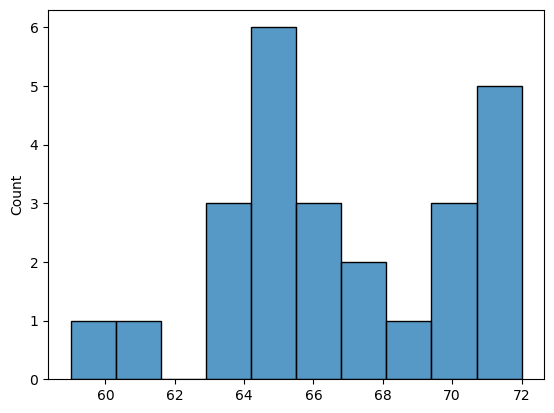

In [22]:
sample_female_heights = [68, 65, 69, 70, 70, 
                         61, 59, 65, 64, 66,
                         72, 71, 68, 66, 64,
                         65, 65, 70, 71, 63, 
                         72, 66, 65, 65, 72]
#sample mean
x_bar = np.mean(sample_female_heights)
serie = pd.Series(sample_female_heights)
print(serie.std())
print(serie.mean())
sns.histplot(serie, bins=10)

#population mean
mu = 65

#sample szie 
n = len(sample_female_heights)

#population standard deviation
std = 4

# z-stat
z = (x_bar - mu)/(4/np.sqrt(n))
z

In [ ]:
# we can use stats to calculate the percentile
print(stats.norm.cdf(z))

# We can also use the survival function to calculate the probability
# p value
print(stats.norm.sf(z))

99% chance your sample comes from a different population

.9 % chance the sample is from the mean

p > alpha(.05) Null Hypothesis True


p < alpha(.05) Alternate Hypothesis True


In [ ]:
p = stats.norm.sf(z)
alpha = .05
if (p> alpha):
    H0 = True 
else:
    H0 = False    
H0

### Example

Let's work with the normal distribution, since it's so useful. Suppose we are told that African elephants have weights distributed normally around a mean of 9000 lbs., with a standard deviation of 900 lbs. Pachyderm Adventures has recently measured the weights of 40 African elephants in Gabon and has calculated their average weight at 8637 lbs. They claim that these statistics on the Gabonese elephants are significant. Let's find out!

What is our null hypothesis?

There is no significant difference in the distribution of weight measurements of Gabonese elephants, in comparison to African Elephants

<details>
    <summary>Answer</summary>
    Null hypothesis: The Gabonese elephants have the same weight as other African elephants.
    </details>

What is our alternative hypothesis?

There is a significant difference in the distribution of weight measurements of Gabonese elephants, in comparison to African Elephants

<details>
    <summary>Answer</summary>
    Alternative hypothesis: The Gabonese elephants do not have the same weight as other African elephants.
    </details>

What is our alpha?

In [ ]:
alpha = .05

<details>
    <summary>Answer</summary>
    Since there is no specification in the problem, let's go with $\alpha=0.05$.

Remember we gave the formula for standard error before as $\frac{\sigma}{\sqrt{n}}$.
<br> Let's calculate that with our elephant numbers.

In [24]:
pop_mean = 9000
sample_size = 40
standard_error = pop_mean / sample_size**(.5)
standard_error

1423.0249470757706

<details>
    <summary>Answer</summary>

```python 
se = 900 / np.sqrt(40)
se = 142.30249470757707
```

Now let's calculate the z-score analytically.
Remember the formula for z-score:
$z = \dfrac{{\bar{x}} - \mu_{0}}{\dfrac{\sigma}{\sqrt{n}}}$

In [28]:
sample_mean = 8637
mu_null = 9000
pop_sigma = 900
sample_size = 40
z_score = (sample_mean - mu_null) / (pop_sigma/np.sqrt(sample_size))
z_score

-2.550903979202493

<details>
    <summary>Answer</summary>

```python 
x_bar = 8637
mu = 9000
se = 142.3

z = (x_bar - mu) / se
z = -2.5509486999297257
# negative means we are on the left side
```






Now let's get our p-value from the test statistic:



In [30]:
p = stats.norm.sf(abs(z_score))
p

0.005372196151815369

<details>
    <summary>Answer</summary>

```python 
# when z is negative use 
p = stats.norm.cdf(z)
p = stats.norm.sf(abs(z))
```

Do we reject the Null Hypothesis?

YES